<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/Clase_18_Nov_19_Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import cv2
import imutils
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
ruta_imagen= "/content/drive/MyDrive/Colab Notebooks/data_set/Laura Alejandra Fuentes Arevalo foto.jpg"

**Reading images**

In [75]:
#Las imagenes serán procesadas con formato de NUMPY
img_mpl = plt.imread(ruta_imagen)
img_cv2 = cv2.imread(ruta_imagen)

#Las imagenes tendrá 3 dimensiones: (height, width, channels) =  (altura, ancho, canales)

print("img_mpl")
print(img_mpl)
print("type(img_mpl): ", type(img_mpl))
print("img_mpl.shape :", img_mpl.shape)
print("max color: ", img_mpl.max())
#Flatten es mostrar todos los valores de los píxeles como una sola Numpy Array
print("FLATTEN: ", img_mpl.flatten())
#Convirtiéndolo en una serie
print(pd.Series(img_mpl.flatten()))

print("-------------------------")
print("img_cv2")
print(img_cv2)
print("type(img_cv2): ",type(img_cv2))
print("img_cv2.shape: ",img_cv2.shape)
print("max color: ", img_cv2.max())
print("FLATTEN: ", img_cv2.flatten())

img_mpl
[[[157 150 132]
  [156 149 131]
  [153 146 128]
  ...
  [218 207 185]
  [219 208 186]
  [220 209 187]]

 [[157 150 132]
  [156 149 131]
  [153 146 128]
  ...
  [218 207 185]
  [219 208 186]
  [220 209 187]]

 [[156 149 131]
  [155 148 130]
  [154 147 129]
  ...
  [218 207 185]
  [219 208 186]
  [220 209 187]]

 ...

 [[174 172 159]
  [174 172 159]
  [174 172 159]
  ...
  [224 220 208]
  [225 221 209]
  [226 222 210]]

 [[173 171 158]
  [173 171 158]
  [173 171 158]
  ...
  [233 229 217]
  [232 228 216]
  [231 227 215]]

 [[173 171 158]
  [173 171 158]
  [173 171 158]
  ...
  [234 232 219]
  [233 231 218]
  [231 229 216]]]
type(img_mpl):  <class 'numpy.ndarray'>
img_mpl.shape : (1066, 800, 3)
max color:  255
FLATTEN:  [157 150 132 ... 231 229 216]
0          157
1          150
2          132
3          156
4          149
          ... 
2558395    231
2558396    218
2558397    231
2558398    229
2558399    216
Length: 2558400, dtype: uint8
-------------------------
img_cv2
[[[132

Histograma de la img_mpl: 
AxesSubplot(0.125,0.125;0.775x0.755)


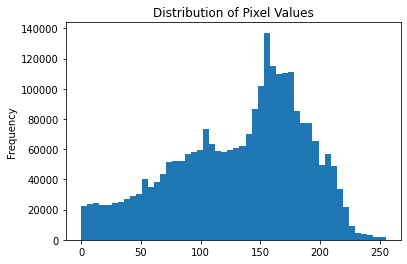

In [76]:
#Histograma de la imagen
print("Histograma de la img_mpl: ")
print(pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values'))

Histograma de la img_cv2: 
AxesSubplot(0.125,0.125;0.775x0.755)


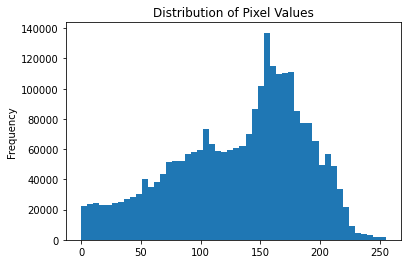

In [77]:
print("Histograma de la img_cv2: ")
print(pd.Series(img_cv2.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values'))

**Display images**

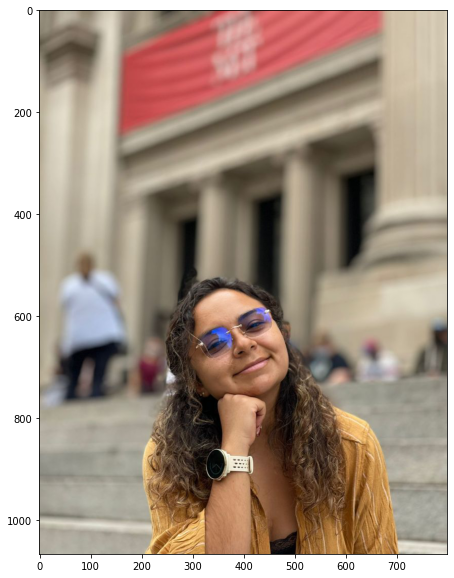

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
#Si no queremos ver los ejes debemos escribir ax.axis('off')
#ax.axis('off')
plt.show()

**Image Channels**

In [79]:
#RGB Channels
#An RGB image has three channels: red, green, and blue. 
#RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.

In [80]:
img_mpl[:,:,0]

array([[157, 156, 153, ..., 218, 219, 220],
       [157, 156, 153, ..., 218, 219, 220],
       [156, 155, 154, ..., 218, 219, 220],
       ...,
       [174, 174, 174, ..., 224, 225, 226],
       [173, 173, 173, ..., 233, 232, 231],
       [173, 173, 173, ..., 234, 233, 231]], dtype=uint8)

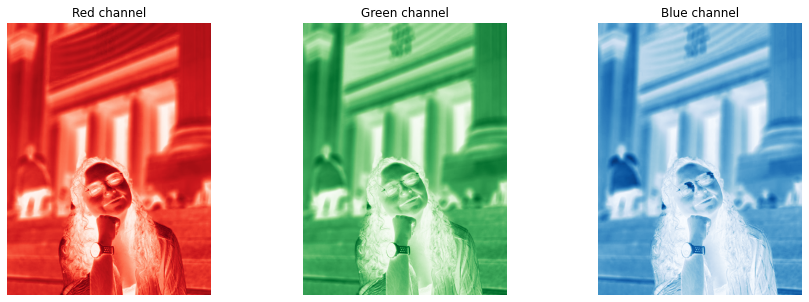

In [81]:
# Display RGB Channels of image_mpl
fig, axs = plt.subplots(1, 3, figsize=(15, 5))   #1 fila, 3 columnas
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

**Matplotlib vs cv2 Numpy Arrays**
*   cv2 reads in channels as BGR
*   matplotlib reads in channels as RGB

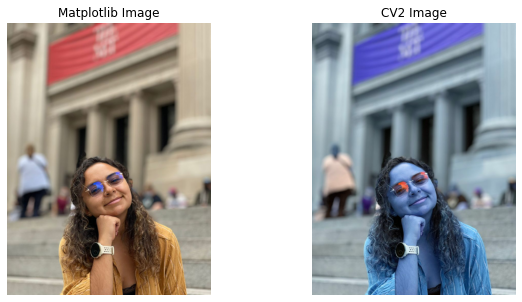

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_mpl)
axs[1].imshow(img_cv2)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Matplotlib Image')
axs[1].set_title('CV2 Image')

plt.show()

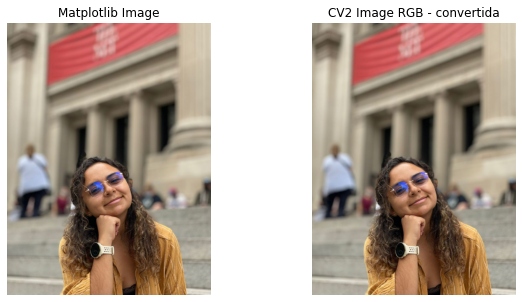

In [83]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_mpl)
axs[1].imshow(img_cv2_rgb)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Matplotlib Image')
axs[1].set_title('CV2 Image RGB - convertida')

plt.show()

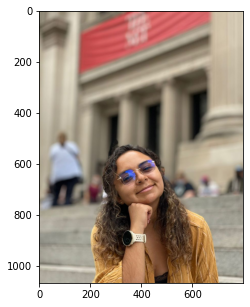

In [84]:
fig, axs = plt.subplots(figsize=(10, 5))
axs.imshow(img_cv2_rgb)

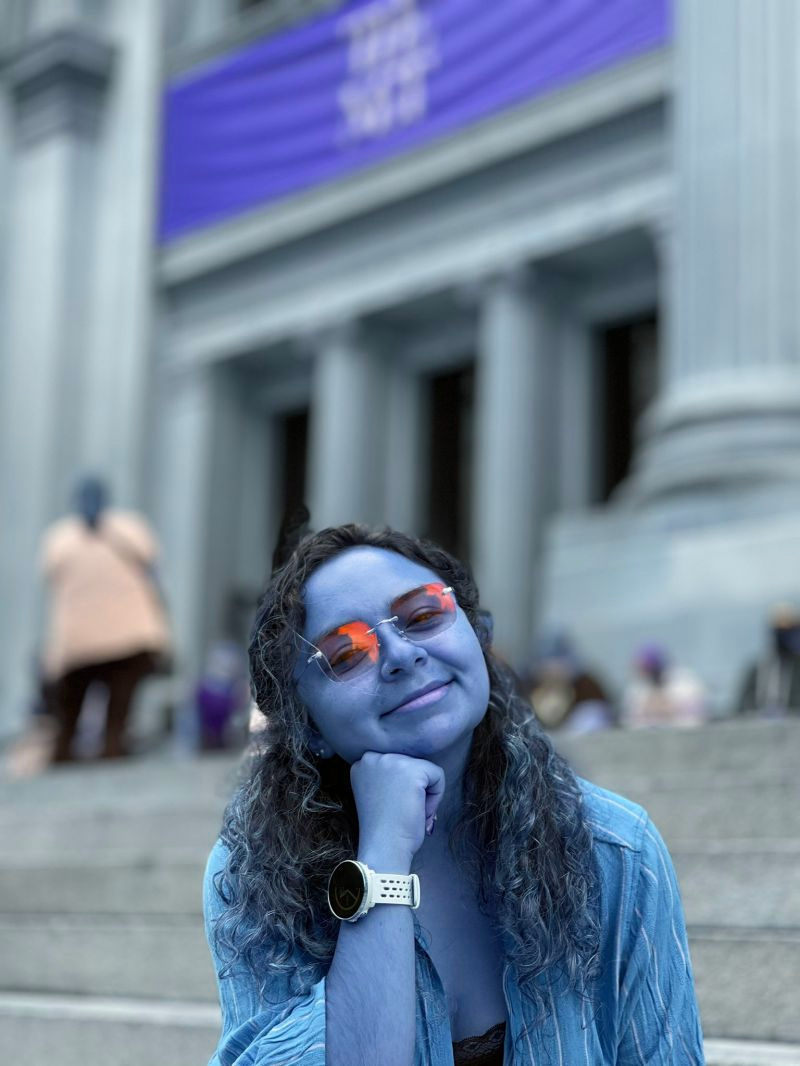

In [85]:
cv2_imshow(img_cv2_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Resizing and Scaling**

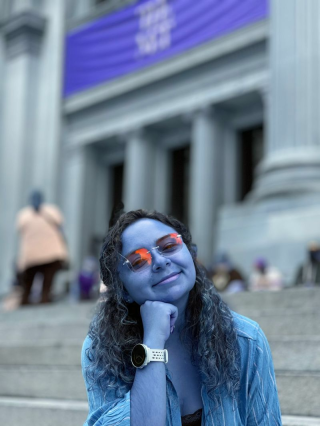

[156 149 131]
SHAPE img_resized: (426, 320, 3)


In [86]:
#Conversion de tamño
img_resized = imutils.resize(img_cv2_rgb, width=320)
cv2_imshow(img_resized)
print(img_resized[0][0])
print("SHAPE img_resized:", img_resized.shape)

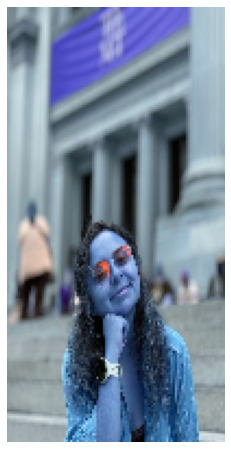

SHAPE img_resize: (200, 100, 3)


In [87]:
# Different Size
img_resize = cv2.resize(img_cv2, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()
print("SHAPE img_resize:", img_resize.shape)

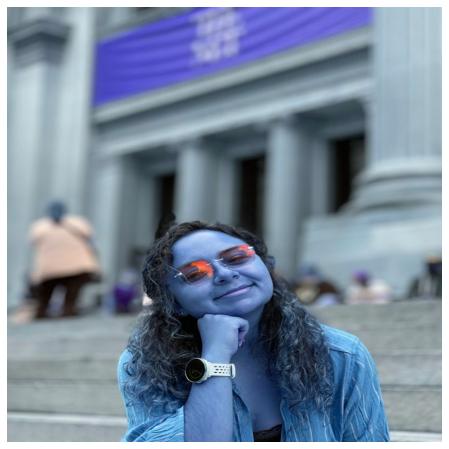

SHAPE img_resized2: (5000, 5000, 3)


In [88]:
#Interpolation is a method for generating points between given points. 
#For example: for points 1 and 2, we may interpolate and find points 1.33 and 1.66
img_resize2 = cv2.resize(img_cv2, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize2)
ax.axis('off')
plt.show()
print("SHAPE img_resized2:", img_resize2.shape)

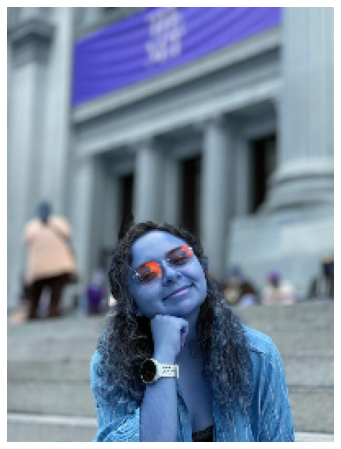

SHAPE img_resized3: (266, 200, 3)


In [89]:
#Si queremos reducir la imagen en un porcentaje, lo haremos así:
img_resized3 = cv2.resize(img_cv2, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized3)
ax.axis('off')
plt.show()
print("SHAPE img_resized3:", img_resized3.shape)

**CONVERSION A BLANCO Y NEGRO**

IMAGEGRAY
[[144 139 137 ... 195 200 203]
 [143 140 136 ... 195 200 203]
 [143 141 136 ... 195 200 203]
 ...
 [169 169 169 ... 209 206 205]
 [168 168 168 ... 218 215 216]
 [167 168 168 ... 226 225 224]]
TYPE IMAGEGRAY:  <class 'numpy.ndarray'>
SHAPE IMAGEGRAY: (426, 320)
MAX COLOR IMAGEGRAY:  246
FLATTEN IMAGEGRAY:  [144 139 137 ... 226 225 224]
IMAGEGRAY COMO SERIE: 
0         144
1         139
2         137
3         133
4         130
         ... 
136315    227
136316    230
136317    226
136318    225
136319    224
Length: 136320, dtype: uint8
-------------------------


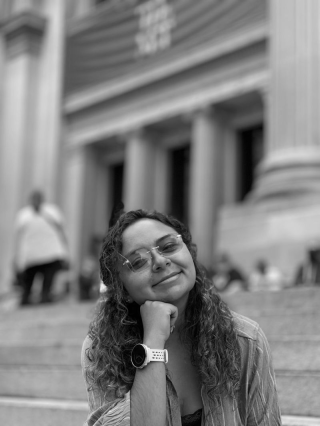

In [90]:
#Conversion de grises
imagegray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

print("IMAGEGRAY")
print(imagegray)
print("TYPE IMAGEGRAY: ", type(imagegray))
#Las imagenes a blanco y negro solo tienen 2 dimensiones, porque solo son un canal, el de la escala de gris
print("SHAPE IMAGEGRAY:", imagegray.shape)
print("MAX COLOR IMAGEGRAY: ", imagegray.max())
#Flatten es mostrar todos los valores de los píxeles como una sola Numpy Array
print("FLATTEN IMAGEGRAY: ", imagegray.flatten())
#Convirtiéndolo en una serie
print("IMAGEGRAY COMO SERIE: ")
print(pd.Series(imagegray.flatten()))
print("-------------------------")

cv2_imshow(imagegray)

**COLOR ROJO...**

In [91]:
#rojos
rojoBajo1 = np.array([10, 40, 90], np.uint8)
rojoAlto1 = np.array([200, 155, 155], np.uint8)

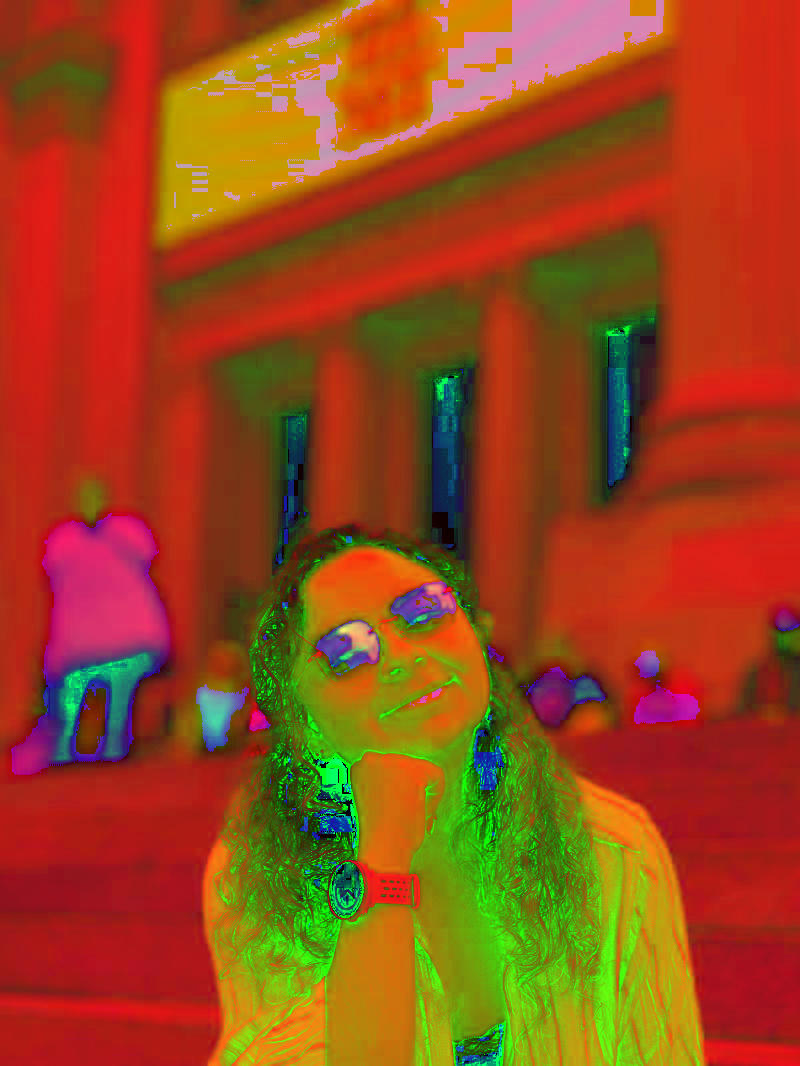

[ 22  41 157]


In [92]:
imageHSV = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2HSV)
cv2_imshow(imageHSV)
print(imageHSV[0][0])

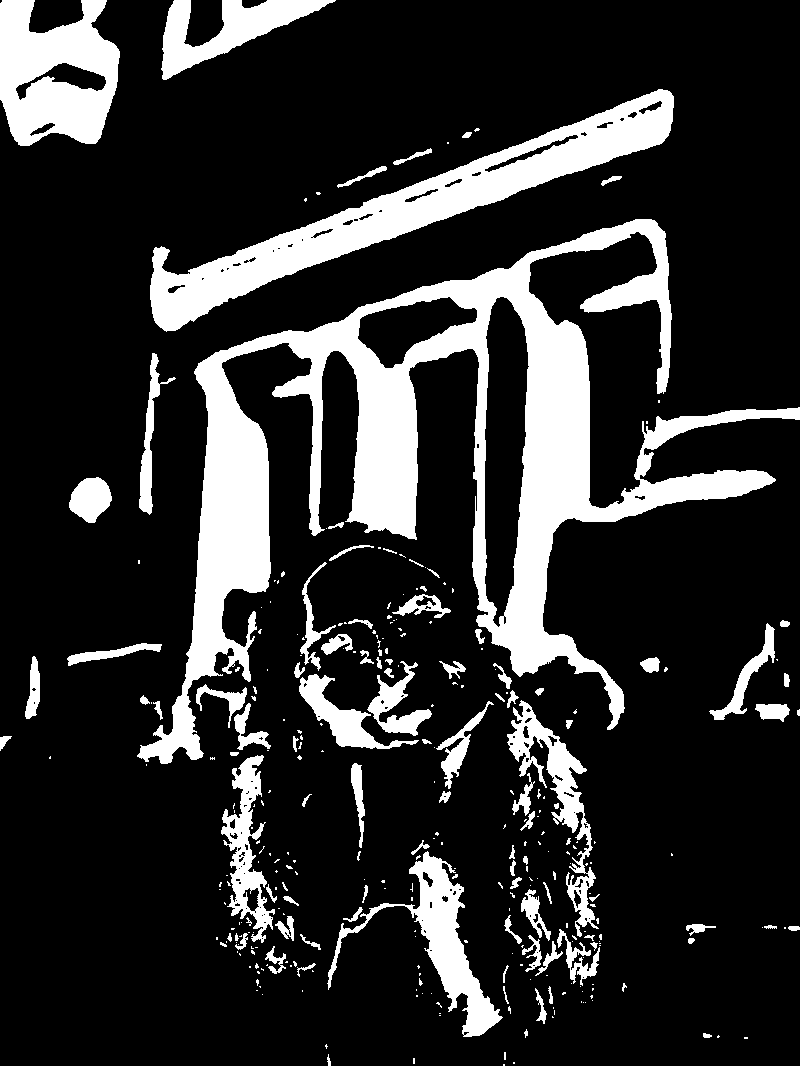

In [93]:
maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)

mask = cv2.medianBlur(maskRojo1, 3)
cv2_imshow(mask)

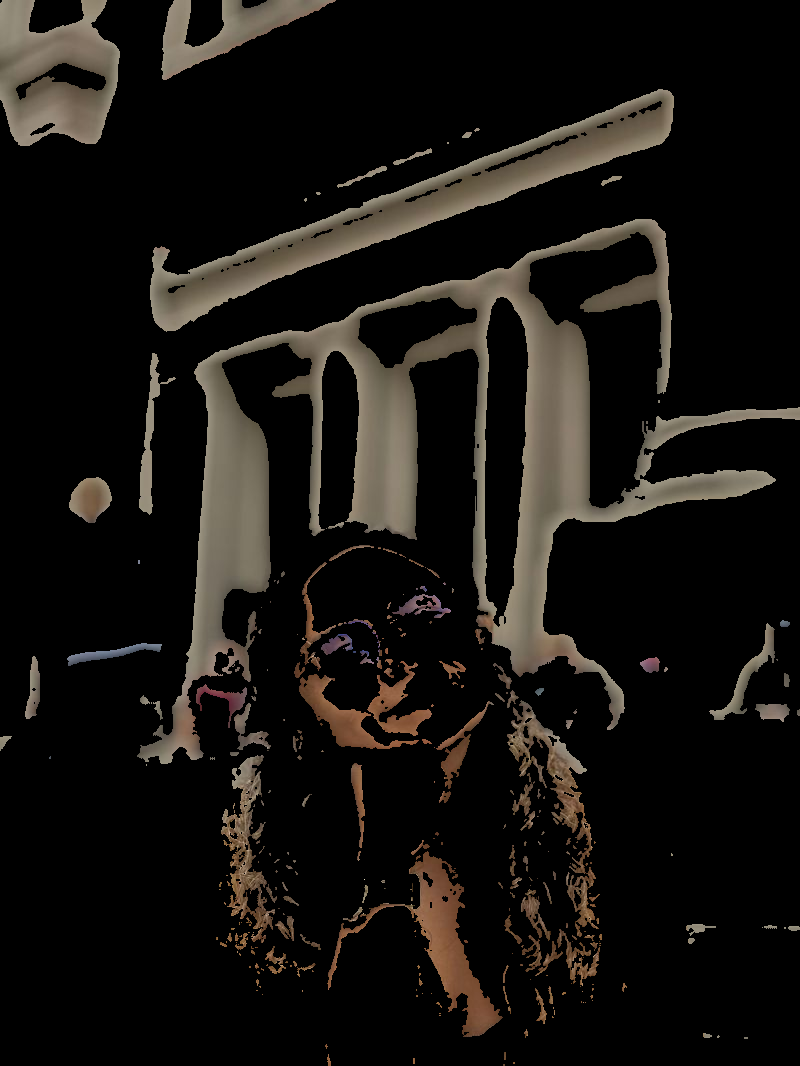

In [94]:
redDetected = cv2.bitwise_and(img_cv2,img_cv2,mask=mask)
cv2_imshow(redDetected)

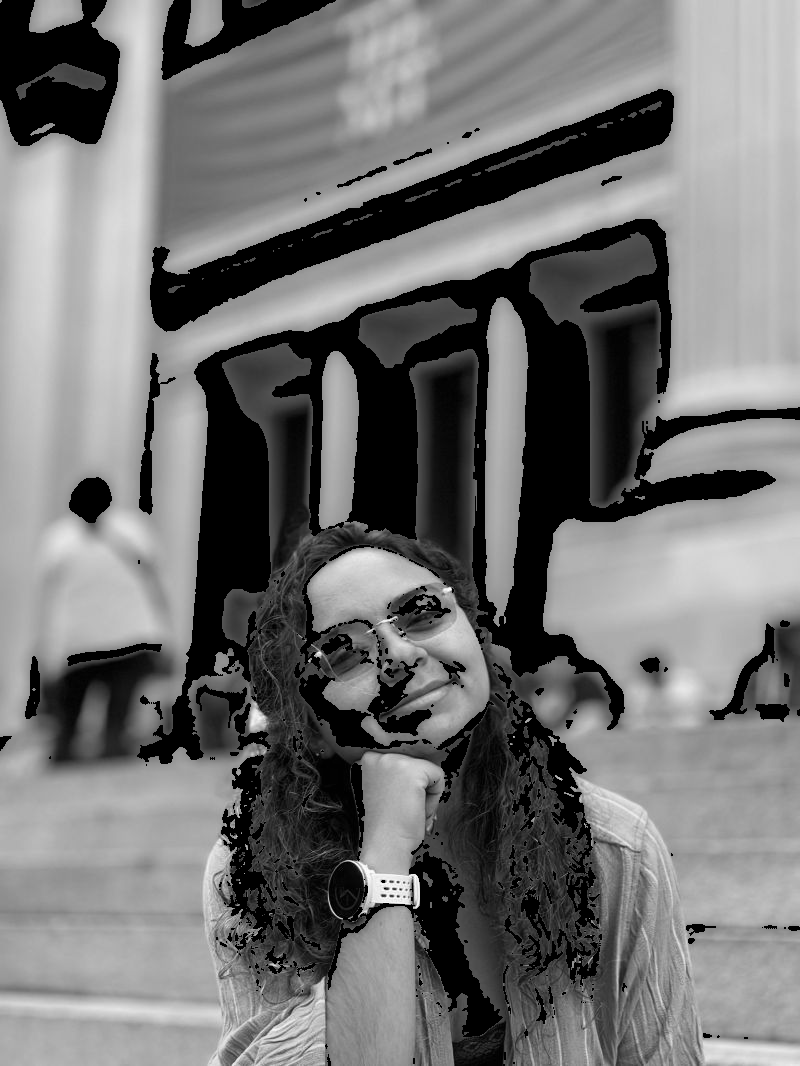

In [95]:
invMask = cv2.bitwise_not(mask)
imagegray2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
bgGray = cv2.bitwise_and(imagegray2,imagegray2,mask=invMask)
cv2_imshow(bgGray)

In [96]:
print(bgGray.shape)
print(redDetected.shape)

(1066, 800)
(1066, 800, 3)


In [97]:
#NO SE POR QUÉ AQUÍ ME APARECE ERROR... Lo que entiendo en que como una de ellas tiene 3 canales y la otra 1 canal, no me las deja añadir la una a la otra.

finalImage = cv2.add(bgGray,redDetected)
# Visualización
cv2_imshow(finalImage)

error: ignored

**CV2 Kernels**

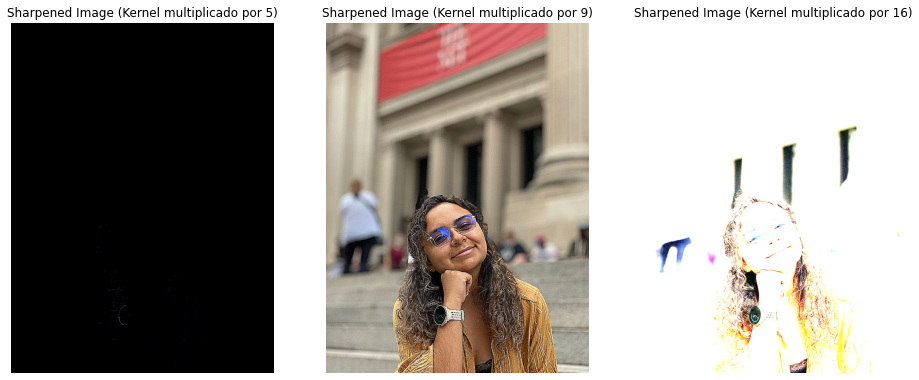

In [98]:
# Sharpen Image
#Si queremos aún más luminosa, podremos cambiar el multiplicador de la mitad de la matriz (5,9,16)
kernel_sharpening1 = np.array([[-1,-1,-1], 
                              [-1,5,-1], 
                              [-1,-1,-1]])

sharpened1 = cv2.filter2D(img_cv2_rgb, -1, kernel_sharpening1)

kernel_sharpening2 = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

sharpened2 = cv2.filter2D(img_cv2_rgb, -1, kernel_sharpening2)

kernel_sharpening3 = np.array([[-1,-1,-1], 
                              [-1,16,-1], 
                              [-1,-1,-1]])

sharpened3 = cv2.filter2D(img_cv2_rgb, -1, kernel_sharpening3)

fig, ax = plt.subplots(1,3,figsize=(16, 16))
ax[0].imshow(sharpened1)
ax[1].imshow(sharpened2)
ax[2].imshow(sharpened3)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Sharpened Image (Kernel multiplicado por 5)')
ax[1].set_title('Sharpened Image (Kernel multiplicado por 9)')
ax[2].set_title('Sharpened Image (Kernel multiplicado por 16)')
plt.show()


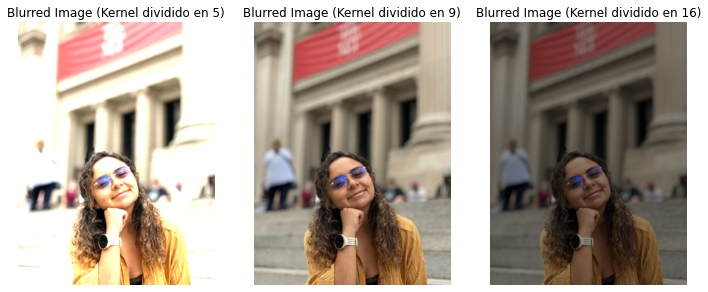

In [99]:
# Blurring the image
#Si queremos aún más luminosa, podremos cambiar el divisor (En este caso, el 5,9,16)
kernel_3x3_a = np.ones((3, 3), np.float32) / 5
blurred1 = cv2.filter2D(img_cv2_rgb, -1, kernel_3x3_a)
kernel_3x3_b = np.ones((3, 3), np.float32) / 9
blurred2 = cv2.filter2D(img_cv2_rgb, -1, kernel_3x3_b)
kernel_3x3_c = np.ones((3, 3), np.float32) / 16
blurred3 = cv2.filter2D(img_cv2_rgb, -1, kernel_3x3_c)

fig, ax = plt.subplots(1,3,figsize=(12, 12))
ax[0].imshow(blurred1)
ax[1].imshow(blurred2)
ax[2].imshow(blurred3)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Blurred Image (Kernel dividido en 5)')
ax[1].set_title('Blurred Image (Kernel dividido en 9)')
ax[2].set_title('Blurred Image (Kernel dividido en 16)')
plt.show()

In [100]:
#GUARDAR LA IMAGEN
#plt.imsave('mpl_dog.png', blurred)
#cv2.imwrite('cv2_dog.png', blurred)

**EJERCICIO DE CLASE: SOLO VER UN COLOR**

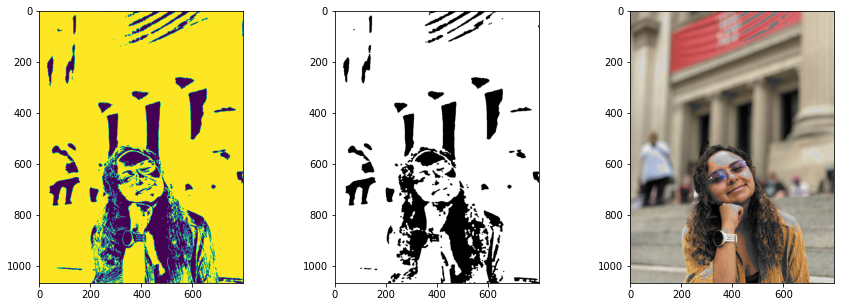

In [101]:
# threshold on orange
lower = (50,50,50)
upper = (220,220,220)
thresh = cv2.inRange(img_cv2_rgb, lower, upper)

# apply morphology and make 3 channels as mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.merge([mask,mask,mask])

# create 3-channel grayscale version
gray = cv2.cvtColor(img_cv2_rgb, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# blend img with gray using mask
result = np.where(mask==255, img_cv2_rgb, gray)

# save images
cv2.imwrite('orange_cone_thresh.jpg', thresh)
cv2.imwrite('orange_cone_mask.jpg', mask)
cv2.imwrite('orange_cone_result.jpg', result)

fig, axs = plt.subplots(1,3,figsize=(15, 5))
axs[0].imshow(thresh)
axs[1].imshow(mask)
axs[2].imshow(result)
